In [115]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/daily_data.csv')

In [ ]:
df.head()

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyCoolingDegreeDays,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,WindEquipmentChangeDate
0,72518014735,2015-01-01T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",7.0,25.0,46.0,29.97,29.65,21.0,8.8,0.0,1.4,40.0,32.0,18.0,190.0,26.0,0.00,0.0,0.0,190.0,20.0,726.0,1632.0,2006-09-08
1,72518014735,2015-01-02T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",17.0,32.0,57.0,30.18,29.80,26.0,9.5,0.0,8.6,33.0,37.0,26.0,250.0,30.0,T,0.0,T,310.0,23.0,726.0,1633.0,2006-09-08
2,72518014735,2015-01-03T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",18.0,27.0,74.0,30.46,30.16,23.0,4.3,0.0,3.7,38.0,33.0,20.0,170.0,21.0,0.57,0.0,1.6,160.0,15.0,726.0,1634.0,2006-09-08
3,72518014735,2015-01-04T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",35.0,39.0,86.0,29.76,29.47,38.0,10.0,0.0,15.9,26.0,45.0,33.0,290.0,33.0,0.22,1.0,0.0,290.0,24.0,726.0,1635.0,2006-09-08
4,72518014735,2015-01-05T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",11.0,27.0,59.0,30.12,29.73,20.0,16.8,0.0,4.1,38.0,41.0,13.0,280.0,42.0,T,0.0,T,290.0,32.0,726.0,1636.0,2006-09-08


In [ ]:
df.dtypes

STATION                                         int64
DATE                                           object
REPORT_TYPE                                    object
SOURCE                                          int64
BackupElements                                 object
BackupElevation                                 int64
BackupEquipment                                object
BackupLatitude                                float64
BackupLongitude                               float64
BackupName                                     object
DailyAverageDewPointTemperature               float64
DailyAverageDryBulbTemperature                float64
DailyAverageRelativeHumidity                  float64
DailyAverageSeaLevelPressure                  float64
DailyAverageStationPressure                   float64
DailyAverageWetBulbTemperature                float64
DailyAverageWindSpeed                         float64
DailyCoolingDegreeDays                        float64
DailyDepartureFromNormalAver

In [ ]:
df.isnull().sum()

STATION                                       0
DATE                                          0
REPORT_TYPE                                   0
SOURCE                                        0
BackupElements                                0
BackupElevation                               0
BackupEquipment                               0
BackupLatitude                                0
BackupLongitude                               0
BackupName                                    0
DailyAverageDewPointTemperature               0
DailyAverageDryBulbTemperature                0
DailyAverageRelativeHumidity                  0
DailyAverageSeaLevelPressure                  0
DailyAverageStationPressure                   0
DailyAverageWetBulbTemperature                0
DailyAverageWindSpeed                         0
DailyCoolingDegreeDays                        0
DailyDepartureFromNormalAverageTemperature    0
DailyHeatingDegreeDays                        0
DailyMaximumDryBulbTemperature          

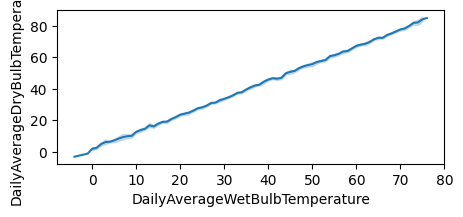

In [14]:
plt.figure(figsize=(5,2))
sns.lineplot(x= 'DailyAverageWetBulbTemperature', y='DailyAverageDryBulbTemperature', data = df)
plt.show()

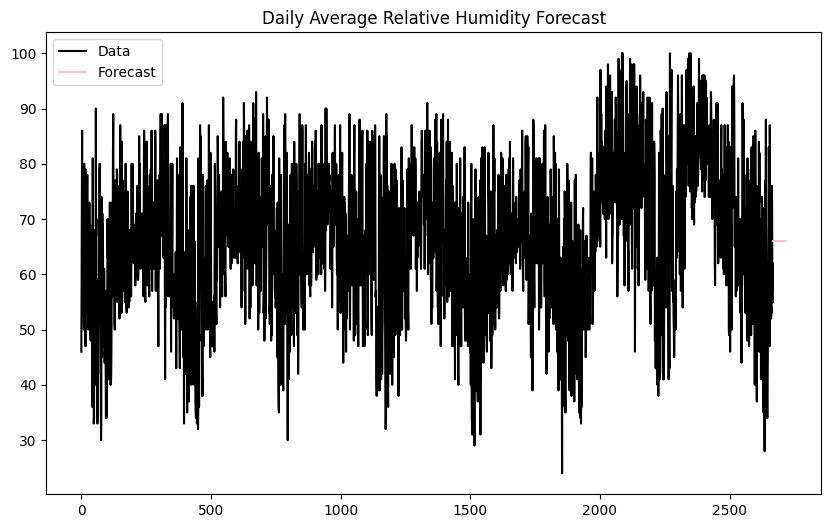

In [81]:
model = ARIMA(df["DailyAverageRelativeHumidity"])
fit_model = model.fit()

forecast = fit_model.get_forecast(steps=50)
plt.figure(figsize=(10,6))

plt.plot(df["DailyAverageRelativeHumidity"], label= "Data", color="black")
plt.plot(forecast.predicted_mean, label ="Forecast", color="pink")
plt.title("Daily Average Relative Humidity Forecast")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Daily Peak Wind Direction at different stations')

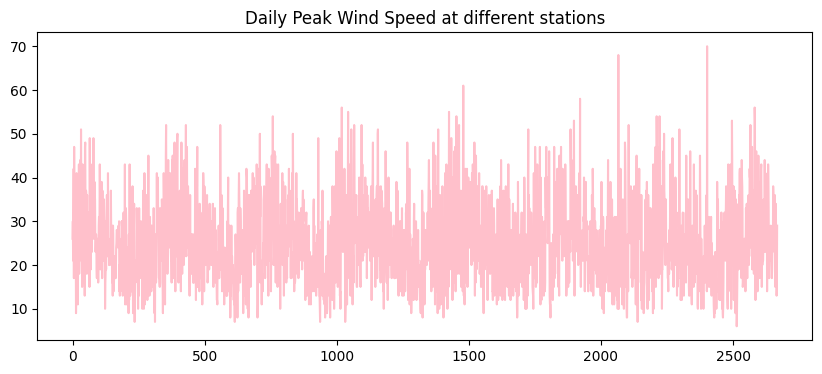

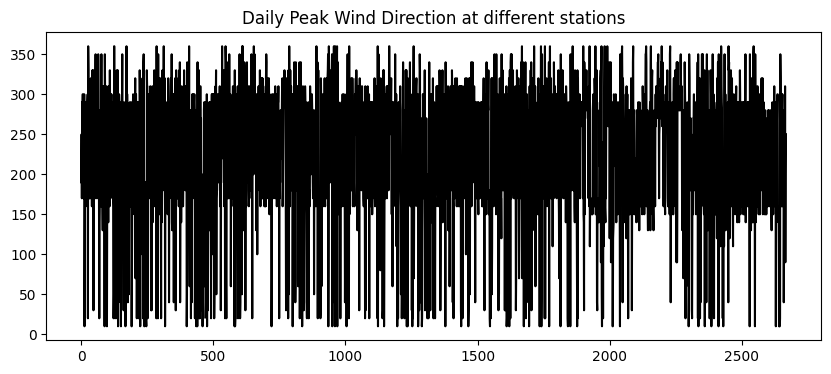

In [24]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df["DailyPeakWindSpeed"], label="peak wind speed", color="pink")
plt.title("Daily Peak Wind Speed at different stations")
plt.figure(figsize=(10,4))
plt.plot(df.index, df["DailyPeakWindDirection"], label="peak wind direction", color="black")
plt.title("Daily Peak Wind Direction at different stations")


<Figure size 1200x200 with 0 Axes>

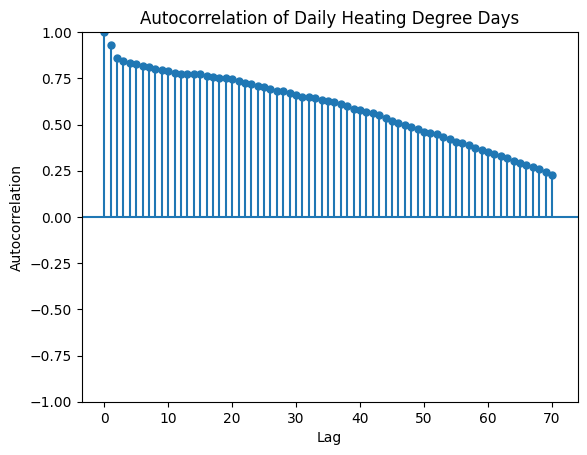

In [50]:
plt.figure(figsize=(12,2))
plot_acf(df['DailyHeatingDegreeDays'], lags=70, alpha =1)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of Daily Heating Degree Days")
plt.show()

<Figure size 1000x600 with 0 Axes>

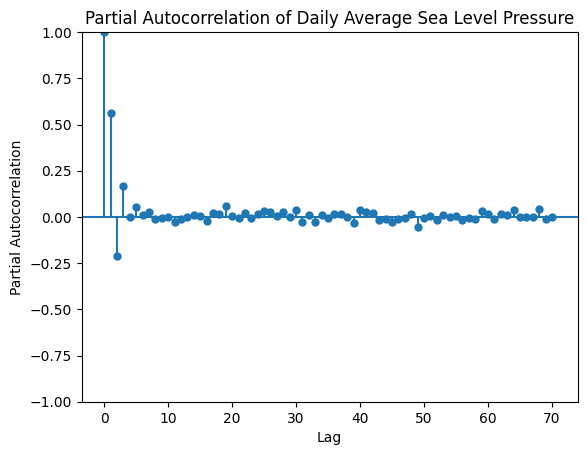

In [119]:
plt.figure(figsize=(10,6))
plot_pacf(df['DailyAverageSeaLevelPressure'], lags=70, alpha =1)
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.title("Partial Autocorrelation of Daily Average Sea Level Pressure")
plt.show()

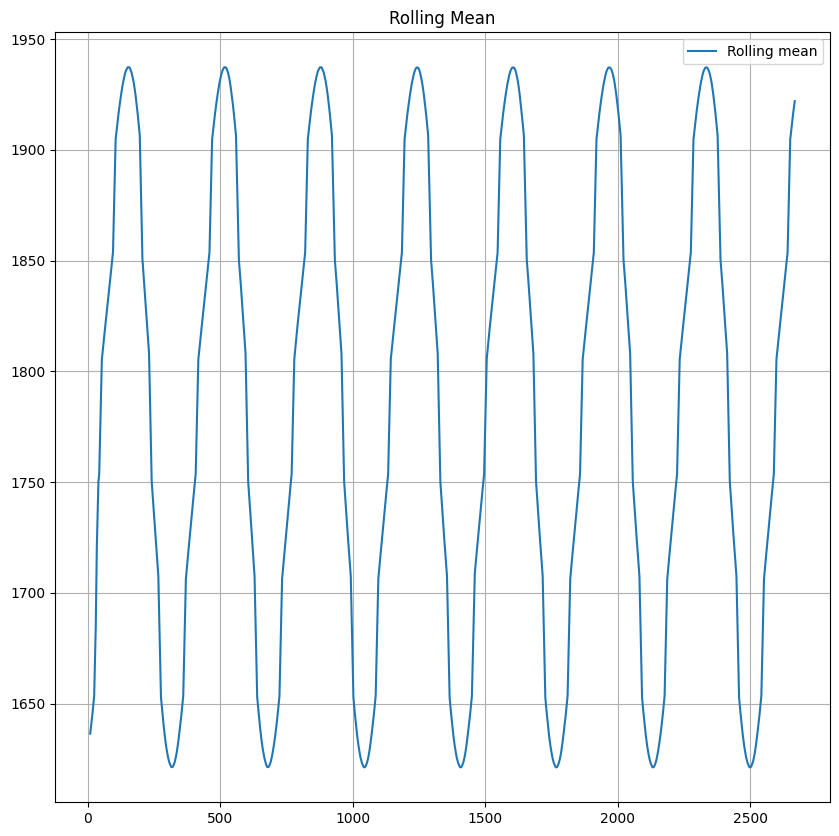

In [83]:
rolling_mean = df["Sunset"].rolling(10).mean()
plt.figure(figsize=(10,10))
plt.plot(rolling_mean, label="Rolling mean")
plt.legend(loc="best")
plt.title("Rolling Mean")
plt.grid(True)
plt.show()

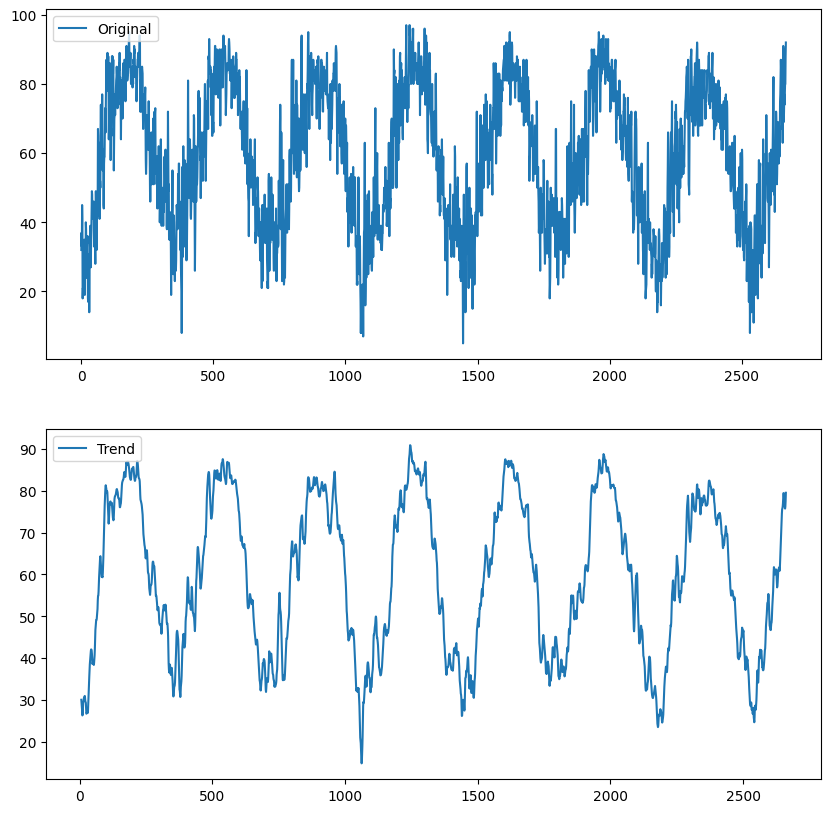

In [76]:
decomposition = sd(df['DailyMaximumDryBulbTemperature'], model='additive', period=12)  # Specify period as needed

plt.figure(figsize=(10, 10))

plt.subplot(211)
plt.plot(df.index, df['DailyMaximumDryBulbTemperature'], label='Original')
plt.legend(loc='upper left')

plt.subplot(212)
plt.plot(df.index, decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

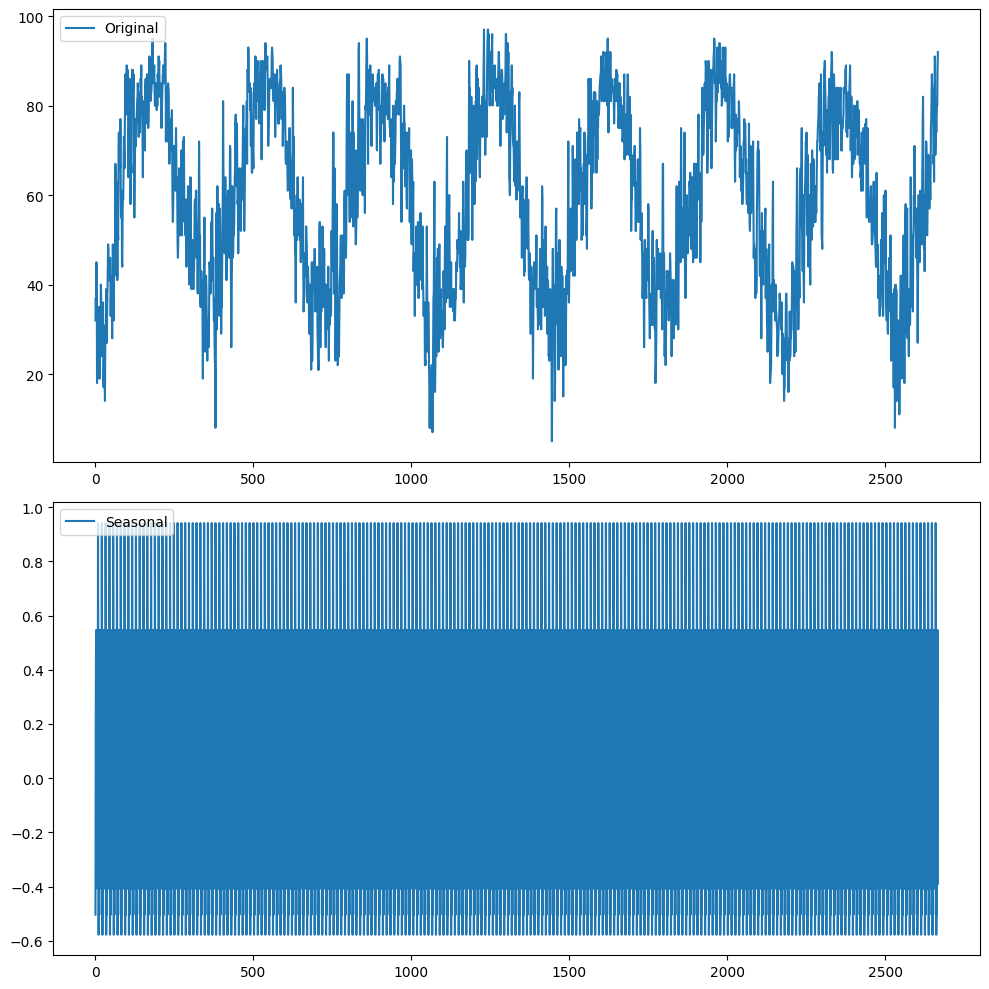

In [80]:
decomposition = sd(df['DailyMinimumDryBulbTemperature'], model='additive', period=12)  # Specify period as needed

plt.figure(figsize=(10, 10))

plt.subplot(211)
plt.plot(df.index, df['DailyMaximumDryBulbTemperature'], label='Original')
plt.legend(loc='upper left')

plt.subplot(212)
plt.plot(df.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')


plt.tight_layout()
plt.show()

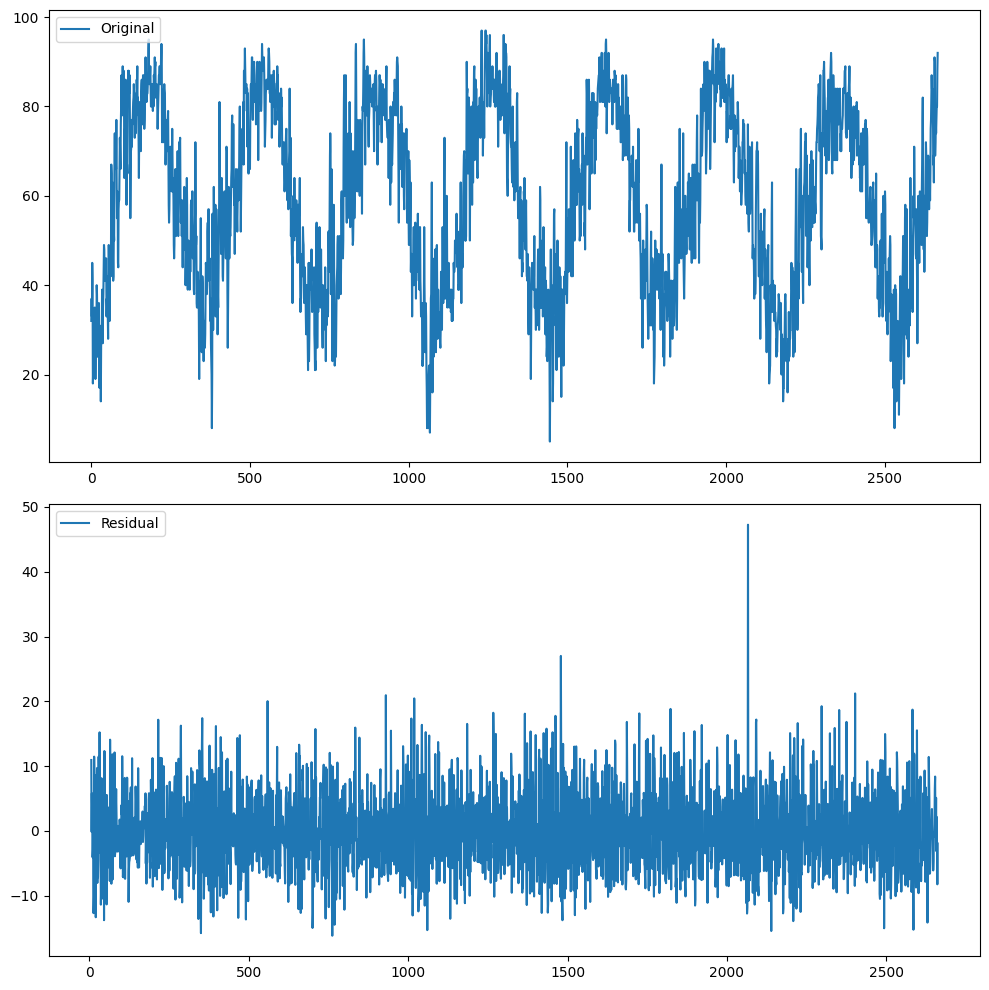

In [82]:
decomposition = sd(df['DailySustainedWindSpeed'], model='additive', period=12)

plt.figure(figsize=(10, 10))

plt.subplot(211)
plt.plot(df.index, df['DailyMaximumDryBulbTemperature'], label='Original')
plt.legend(loc='upper left')

plt.subplot(212)
plt.plot(df.index, decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

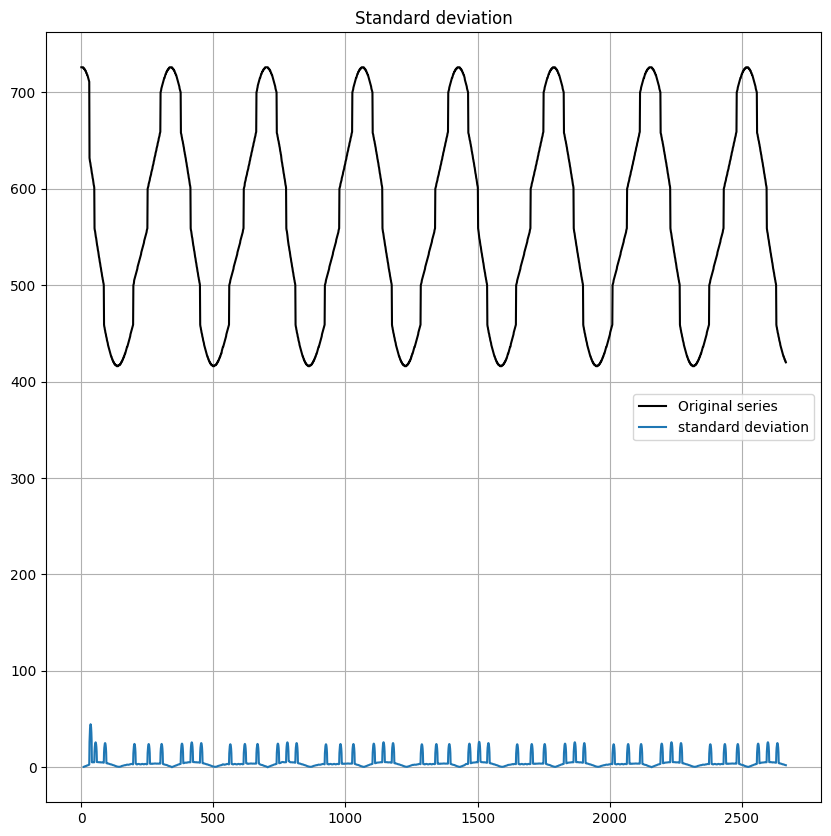

In [100]:
rolling_std = df["Sunrise"].rolling(10).std()
plt.figure(figsize=(10,10))
plt.plot(df["Sunrise"], color="black", label="Original series")
plt.plot(rolling_std, label="standard deviation")
plt.legend(loc="best")
plt.title("Standard deviation")
plt.grid(True)
plt.show()

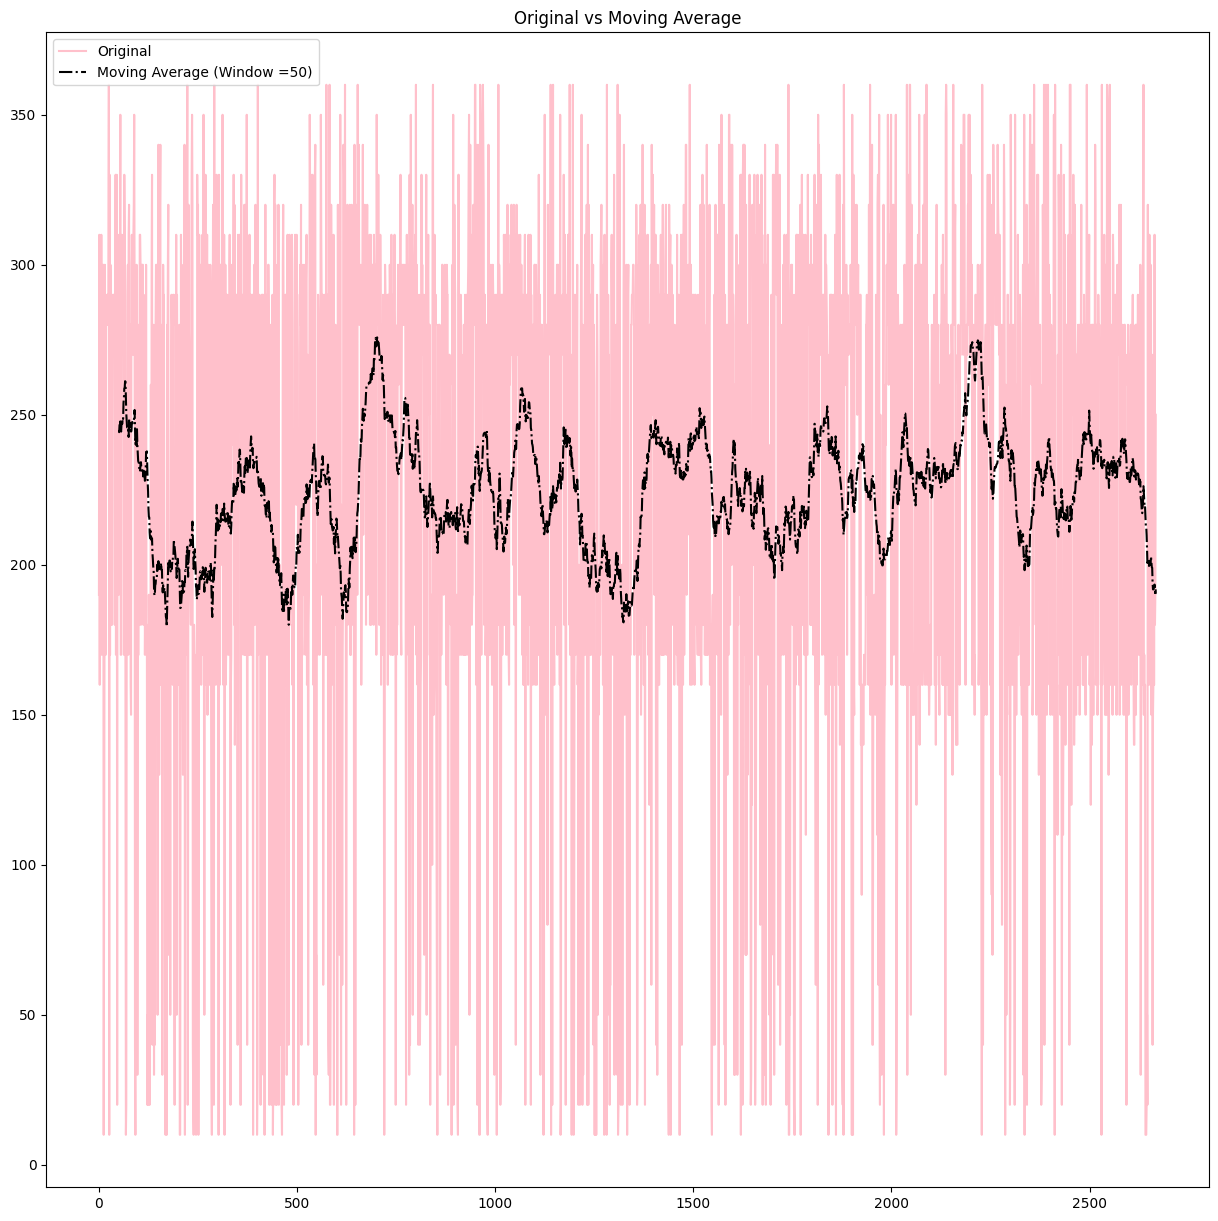

In [96]:
window_size = 50
df["DailySustainedWindDirection_smoothed"] = df["DailySustainedWindDirection"].rolling(window=window_size).mean()
plt.figure(figsize=(15,15))
plt.plot(df["DailySustainedWindDirection"], label="Original", color="pink")
plt.plot(df["DailySustainedWindDirection_smoothed"], label= f"Moving Average (Window ={window_size})", linestyle ="-.", color="black")
plt.title("Original vs Moving Average")
plt.legend()
plt.show()

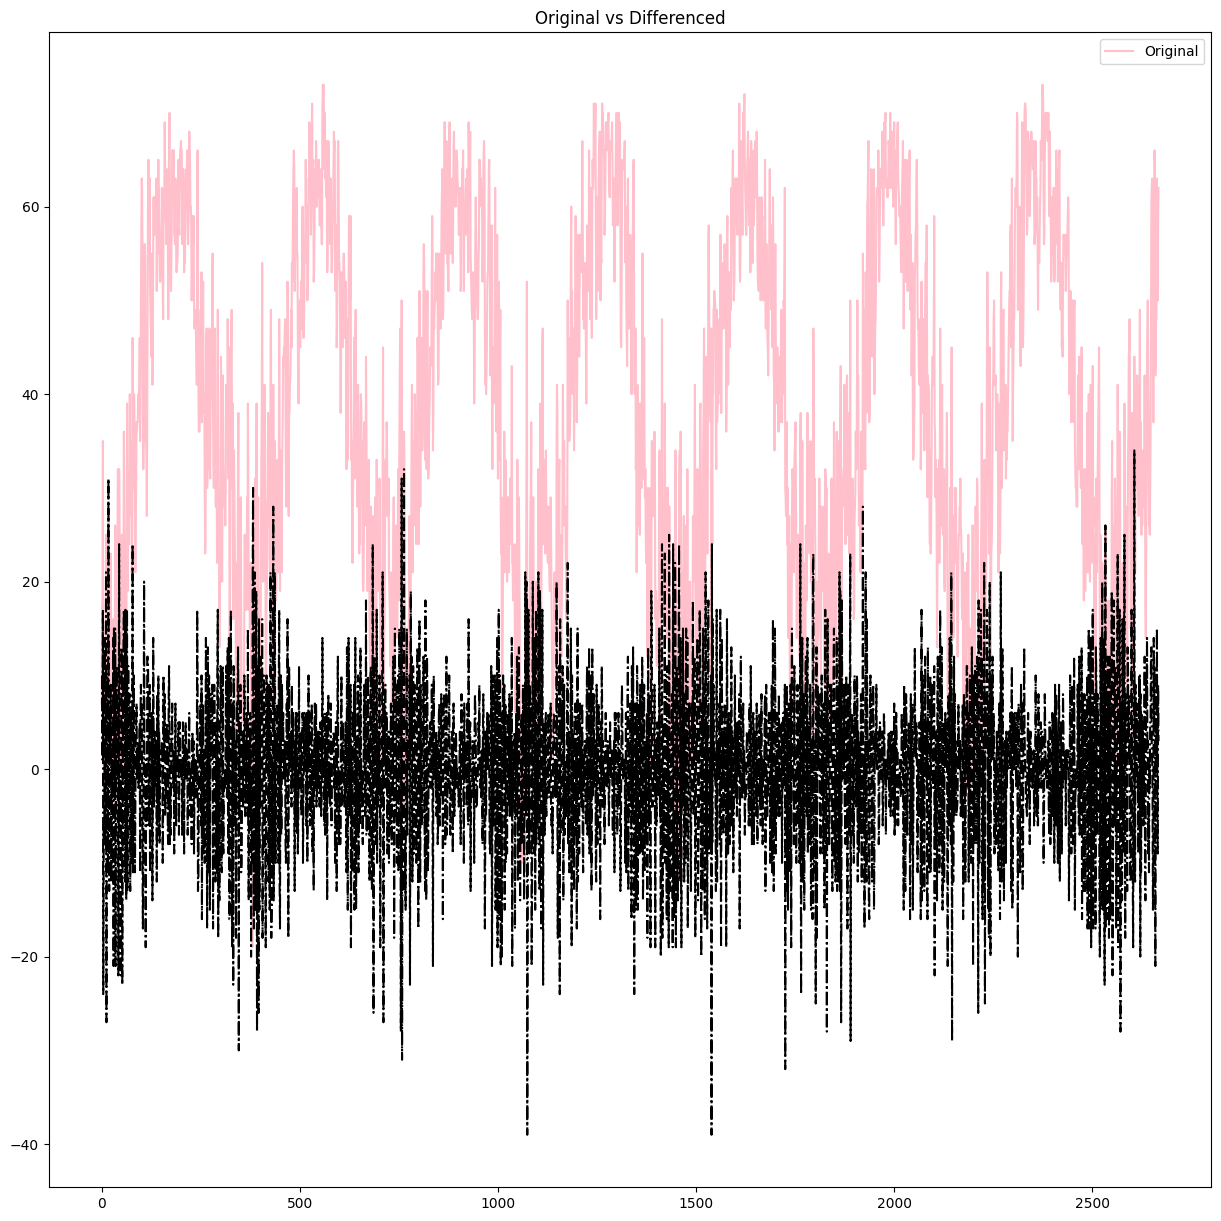

In [101]:
df["DailyAverageDewPointTemperature_diff"] = df["DailyAverageDewPointTemperature"].diff()
plt.figure(figsize=(15,15))
plt.plot(df["DailyAverageDewPointTemperature"], label="Original", color="pink")
plt.plot(df["DailyAverageDewPointTemperature_diff"], label= "", linestyle ="-.", color="black")
plt.title("Original vs Differenced")
plt.legend()
plt.show()

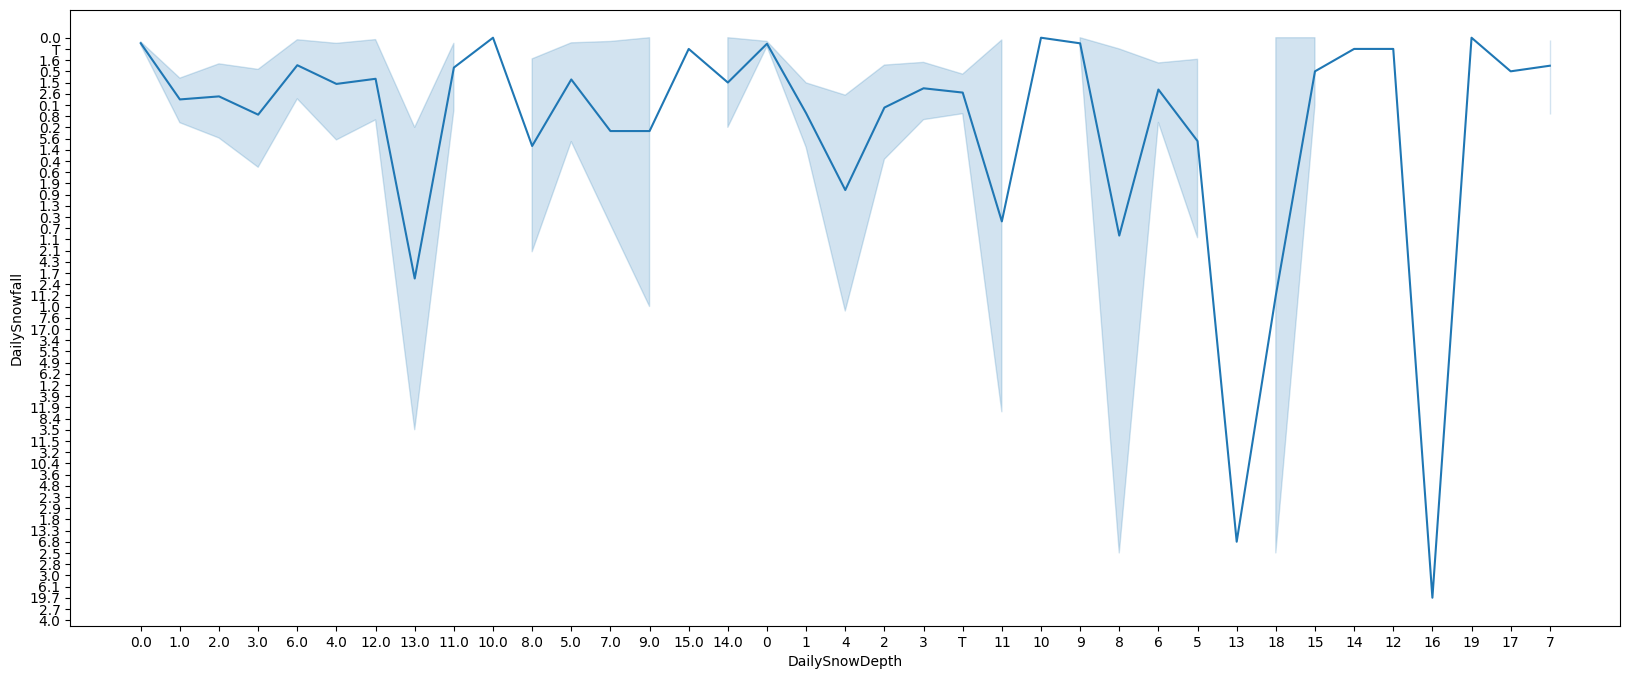

In [106]:
plt.figure(figsize=(20,8))
sns.lineplot(x= 'DailySnowDepth', y='DailySnowfall', data = df)
plt.show()

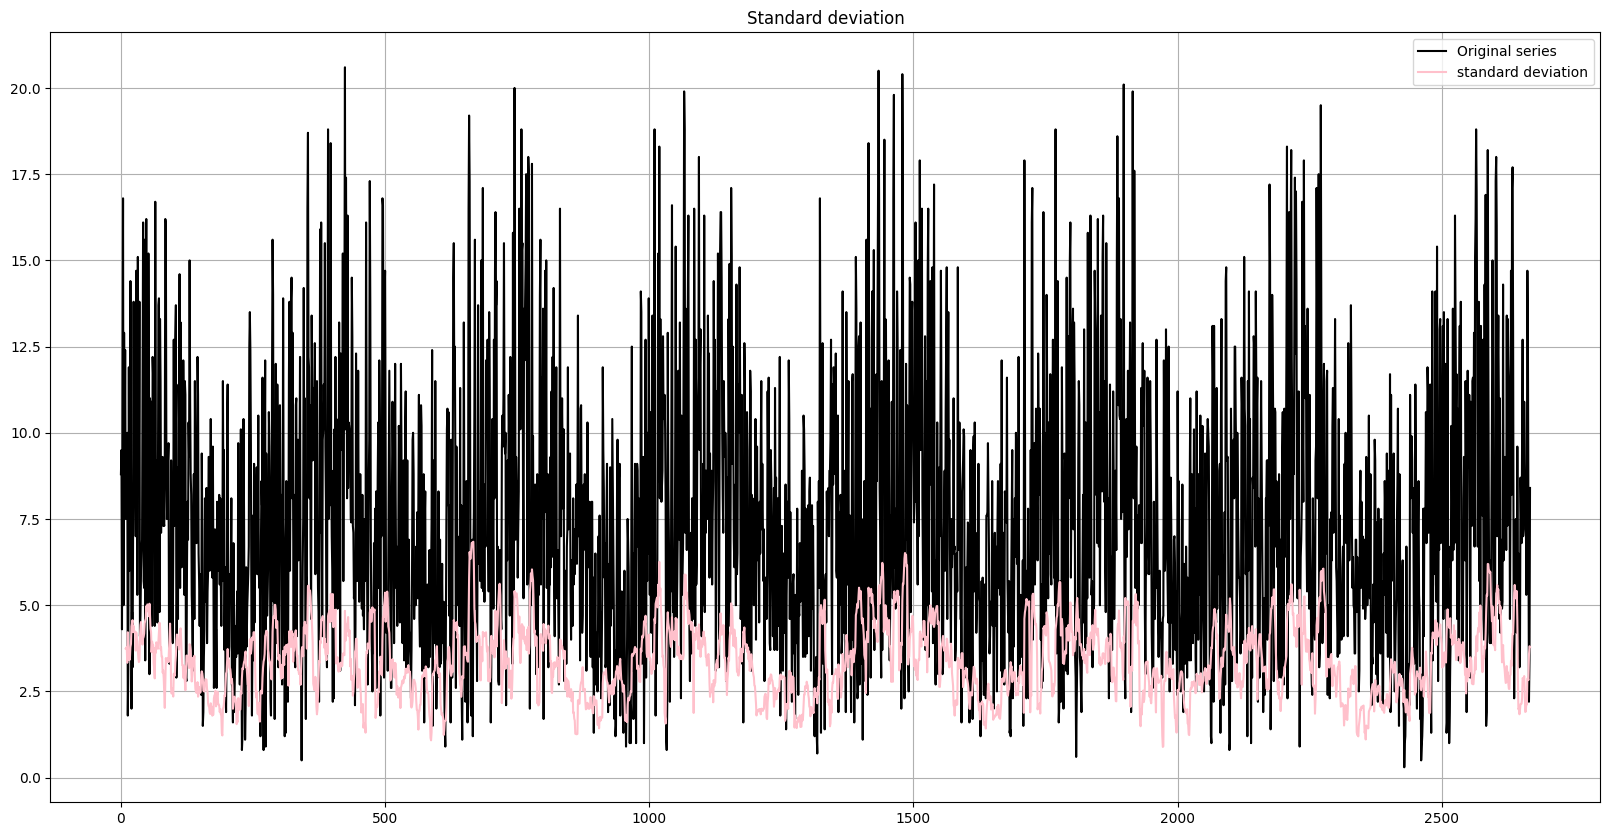

In [113]:
rolling_std = df["DailyAverageWindSpeed"].rolling(10).std()
plt.figure(figsize=(20,10))
plt.plot(df["DailyAverageWindSpeed"], color="black", label="Original series")
plt.plot(rolling_std,color="pink", label="standard deviation")
plt.legend(loc="best")
plt.title("Standard deviation")
plt.grid(True)
plt.show()